<a href="https://colab.research.google.com/github/shiwangi20/Data-Visualization-using-Seaborn/blob/master/Plotting_with_Categorical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting with Categorical Data


---



# Categorical plots belongs to three different families


# 1.   Categorical Scatterplots

*   stripplot() (with kind="strip"; the default)

*   swarmplot() (with kind="swarm")

# 2.   Categorical Distribution Plots

*   boxplot() (with kind="box")

*   boxenplot() (with kind="boxen")

*   violinplot() (with kind="violin")

# 3.   Categorical Estimate Plots

*   pointplot() (with kind="point")
*   barplot() (with kind="bar")
*   countplot() (with kind="count")

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sns.set(style='ticks',color_codes=True)

# Categorical Scatterplots

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1.  Stripplot

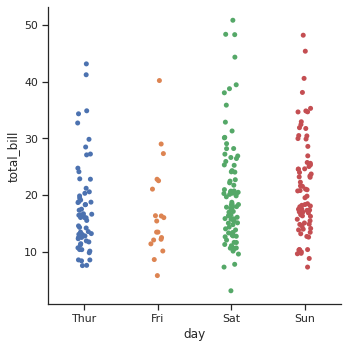

In [4]:
# striplot is the default kind og catplot
sns.catplot(x='day',y = 'total_bill',data=tips)

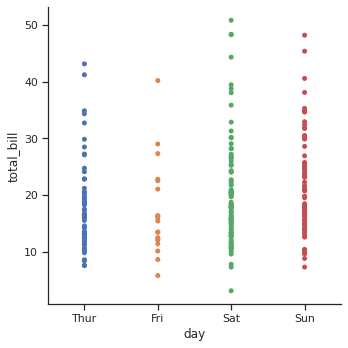

In [5]:
# jitter is used to control the amount of jitter or disable it
sns.catplot(x='day',y='total_bill',jitter=False,data=tips)

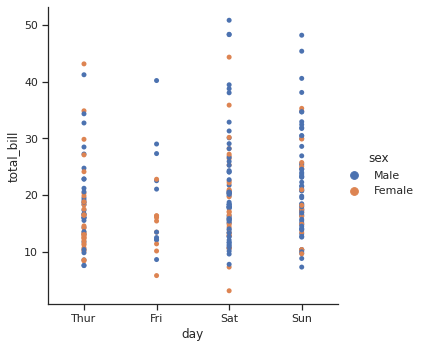

In [6]:
# using semantic hue
sns.catplot(x='day',y='total_bill',hue='sex',jitter=False,data=tips)

## 2.  Swarmplot

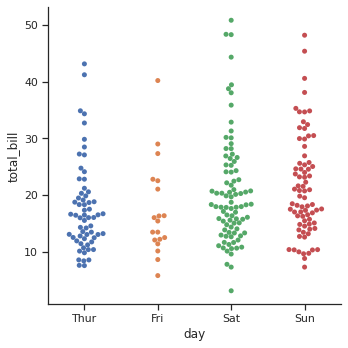

In [7]:
# to prevent the overlapping of points swarmplot is used
sns.catplot(x='day',y='total_bill',kind='swarm',data=tips)

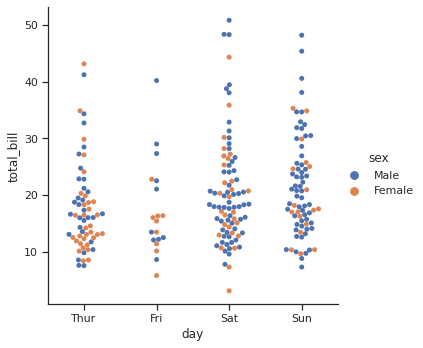

In [8]:
# using semantic hue (size and style are not currently supported)
sns.catplot(x='day',y='total_bill',kind='swarm',hue='sex',data=tips)

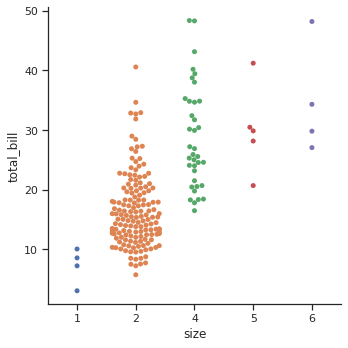

In [9]:
# ordering categorical data
sns.catplot(x='size',y='total_bill',kind='swarm',data=tips.query('size != 3'))

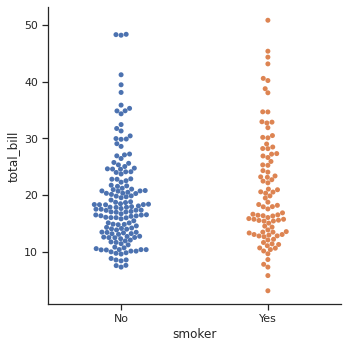

In [10]:
# ordering by using order
sns.catplot(x='smoker',y='total_bill',order=['No','Yes'],kind='swarm',data=tips)

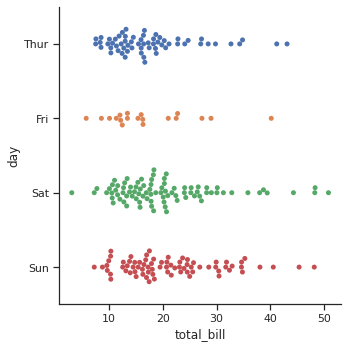

In [11]:
# horizontal axis
sns.catplot(x='total_bill',y='day',kind='swarm',data=tips)

# Distribution within Categories

When size of dataset increases, categorical scatter plots gives limited information.So we use distribution within categories.

## 1.  Boxplot

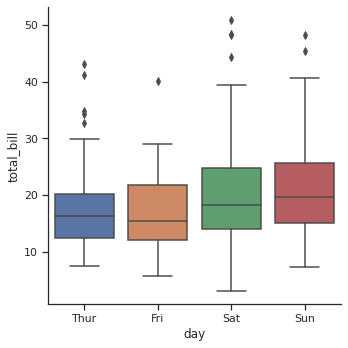

In [12]:
# whiskers extends to 1.5 IQR to lower and upper quartile.Values falling outside are plotted separately
sns.catplot(x='day',y='total_bill',kind='box',data=tips)

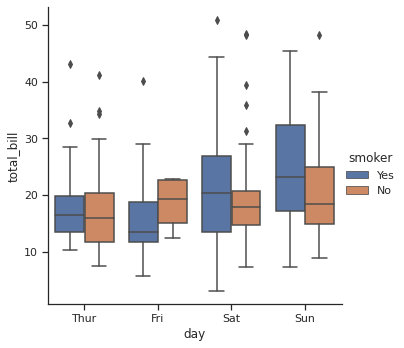

In [13]:
# adding hue semantic
sns.catplot(x='day',y='total_bill',kind='box',hue='smoker',data=tips)

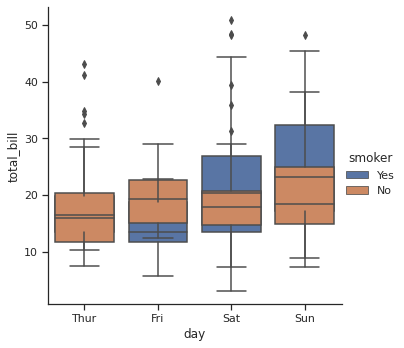

In [14]:
# When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap
# This is called 'dodging'.It can be turned off using dodge = False.
sns.catplot(x='day',y='total_bill',kind='box',hue='smoker',dodge = False,data=tips)

## 2.  Boxenplot

In [15]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


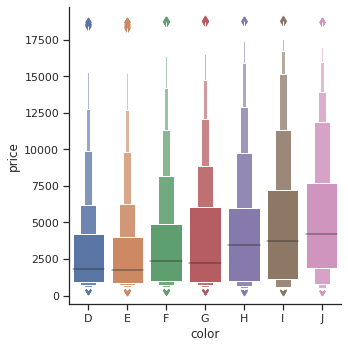

In [16]:
# optimization of boxplot to show the shape of distribution.It is best suited for large datasets
sns.catplot(x='color',y='price',kind='boxen',data=diamonds.sort_values('color'))

## 3.  Violinplot

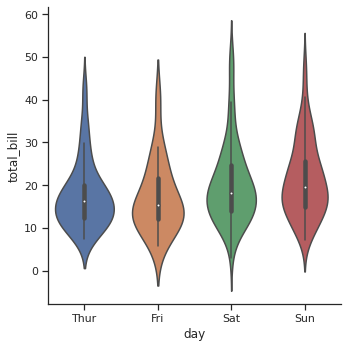

In [17]:
# combines boxplot with kernel distribution
sns.catplot(x='day',y='total_bill',kind='violin',data=tips)

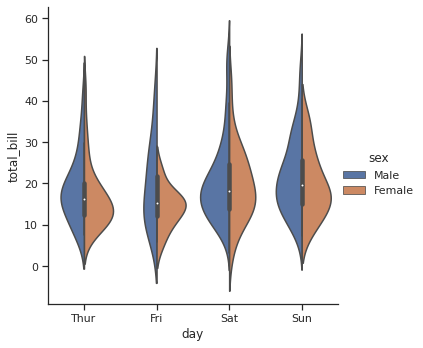

In [18]:
# usind hue and split
sns.catplot(x='day',y='total_bill',kind='violin',hue='sex',split=True,data=tips)

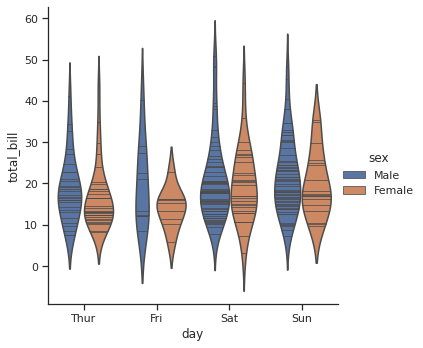

In [19]:
# to show individual observations using inner
sns.catplot(x='day',y='total_bill',kind='violin',hue='sex',inner='stick',data=tips)

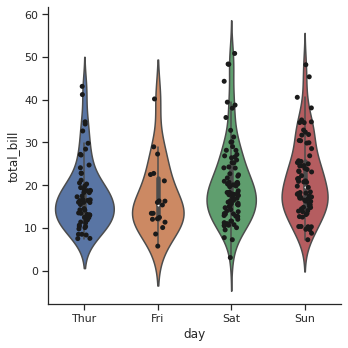

In [20]:
# showing individual observations using stripplot or swarmplot
pl = sns.catplot(x='day',y='total_bill',kind='violin',data=tips)
sns.stripplot(x='day',y='total_bill',color = "k",data=tips,ax=pl.ax)

# Statistical Estimation within Categories

## 1.  Barplot

In [21]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


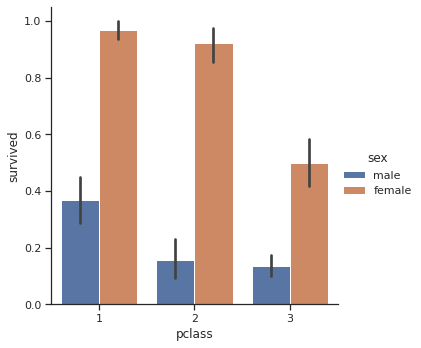

In [22]:
sns.catplot(x='pclass',y='survived',kind='bar',hue='sex',data=titanic)

## 2.  Countplot

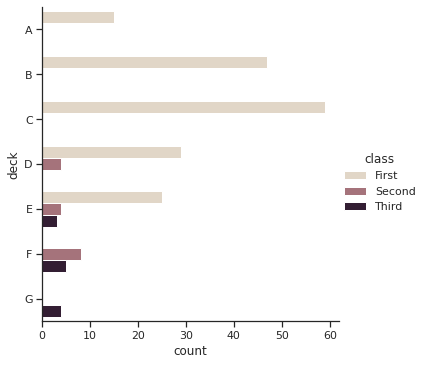

In [23]:
sns.catplot(y="deck", kind="count", palette="ch:.25", hue='class',data=titanic)

## 3.  Pointplot

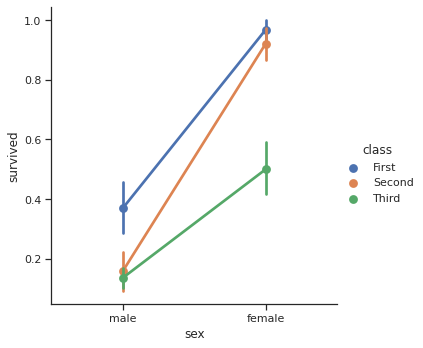

In [24]:
sns.catplot(x='sex',y='survived',hue='class',kind='point',data=titanic)

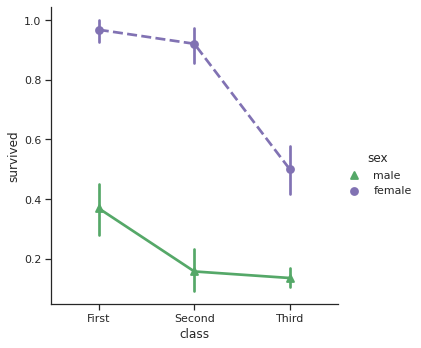

In [25]:
# categorical plots lacks style semantic but same can be done using markers and linestyles
sns.catplot(x='class',y='survived',kind='point',hue='sex',data=titanic,palette={'male':'g','female':'m'},markers=['^','o'],linestyles=['-','--'])

# Plotting 'wide-form' data

Plotting pandas dataframe or 2-D numpy arrays by directly passing data parameter

In [26]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


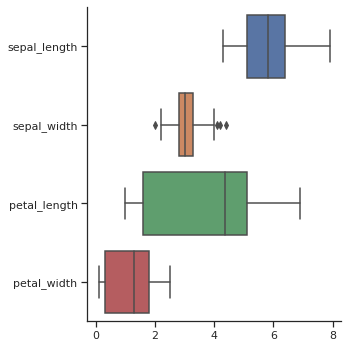

In [27]:
sns.catplot(data=iris,orient='h',kind='box')

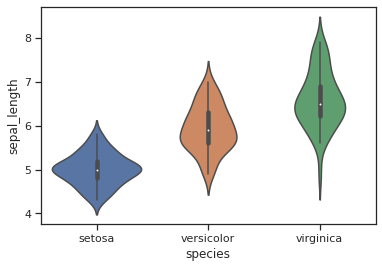

In [28]:
# axes level functions accept vectors rather than pandas dataframes
sns.violinplot(x=iris.species,y=iris.sepal_length)

# Showing Multiple Relationships with Facets

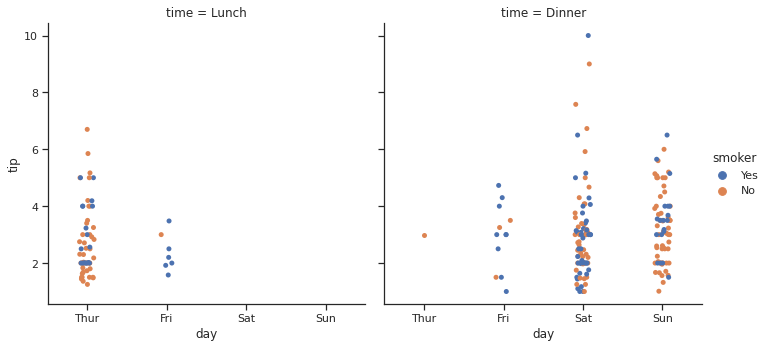

In [29]:
sns.catplot(x='day',y='tip',hue='smoker',data=tips,col='time')

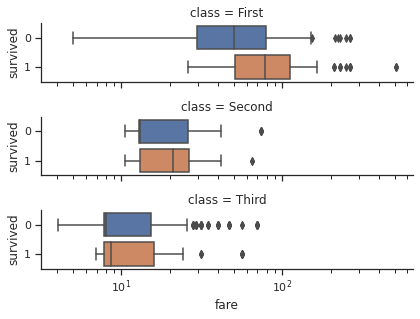

In [30]:
# using methods on the object returned by FacetGrid
g = sns.catplot(x='fare',y='survived',kind='box',data=titanic.query('fare > 0'),row='class',orient='h',height=1.5,aspect=4)
g.set(xscale='log')